# Notebook for fitting of community structure classification

In [1]:
import sys,os
import numpy as np
import networkx as nx
import pickle
sys.path.append("./src/")
import matplotlib.pyplot as plt

Table of Contents:

1. Choose the dataset
2. Partition the graph (community detection)
3. Classify the graph partition types

# 1. Choose the dataset

* Pick one of the available datasets listed in "Data" folder

* Or, add your graph dataset to the "Data" foleder

-- If the graph has edge weight, set the variable "ep_name" as edge attribute name. Otherwise, set the variable "ep_name" as None.

In [2]:
G=nx.read_gml("./Data/Case/polblogs.gml")
#edge weight attribute
ep_name = None

Preprocess graph:
* Use node id as unique id
* Take largested conneted component
* Remove self loops

In [3]:
from preprocess import preprocess

G_nx = preprocess(G,graph_type = "nx")

#for graph_tool network
#G_gt = preprocess(G,graph_type = "gt")
#vp_name = 'title'

print(G_nx)

DiGraph with 1222 nodes and 19021 edges


# 2. Partition the graph (community detection)

* Choose one community detection method from "SBM", "Louvain", "Spectral", "Infomap" and "DNGR"

* Obtain the partition of nodes in groups and store result in "Outputs" folder (as dataname.par, with method name as key and corresponding partition)

In [4]:
from GenModel import detect_community

Louvain Method:

In [5]:
#Louvain
lou_par = detect_community(G_nx,method = "Louvain",ep_name = ep_name)
node_order_nx = [v for v in G_nx.nodes()]

Other methods: each method requires specific packages to be installed

In [6]:
##Spectral
#spec_par = detect_community(G_nx,method = "Spectral",ep_name = ep_name)

##Infomap
#info_par = detect_community(G_nx,method = "Infomap",ep_name = ep_name)

##DNGR
# dngr_par = detect_community(G_nx,method = "DNGR",ep_name = ep_name)

##SBM,  requires graph_tool graph as input while other four methods require networkx graph as input; 
#from Converter import *
#vp_name = 'title'
#G_gt = convert_nx_to_gt(G, vp_name = vp_name,ep_name = ep_name)
#sbm_par = detect_community(G_gt,method = "SBM",ep_name = ep_name)
#node_order_gt = [G_gt.vp[vp_name][n] for n in G_gt.vertices()]

In [7]:
#Store partitions as a dictionary, with method as key
#partition = {"SBM_DC":sbm_par,"LOUVAIN":lou_par,"SPECTRAL":spec_par,"INFOMAP":info_par,"DNGR":dngr_par}
partition = {"LOUVAIN":lou_par}
filename = "./Outputs/MyFile.par"
with open(filename,"wb") as f:
    pickle.dump(partition,f)

# 3. Classify community structure types

* The partition to be analyzed should be stored in the "par" variable, computed from step 2. or loaded from the .par files in the folder "./Outputs/"

* Classify the pairwise community structure type (A,D, CP, or SB) based on density.

In [8]:
from summary_stats import *

# load partition to par
par = partition['LOUVAIN']

summary(G_nx,par,node_order = node_order_nx,ep_name = ep_name,reverse_dir = True)

The number of communities is  9
The number of eligible community is  3
Community structure types fractions are as follows 
Assortative  fraction:  1.0


(array([[0.02297029, 0.00185717, 0.00121664],
        [0.00180682, 0.0294789 , 0.00174528],
        [0.00160911, 0.00179245, 0.025     ]]),
 array([[' ', 'Assortative', 'Assortative'],
        ['Assortative', ' ', 'Assortative'],
        ['Assortative', 'Assortative', ' ']], dtype=object))

For two examples (Louvain with 3 communities and SBM with 5), we print a summary and the plot density matrix indicating the community type.

In [9]:
import seaborn as sns

## Louvain

In [10]:
#Louvain
filename = "./Outputs/Informational/polblogs.par"

with open(filename,"rb") as f:
    partition = pickle.load(f)
    
par = partition['LOUVAIN']
node_order = [v for v in G_nx.nodes()]
den,comm_matrix = summary(G_nx,par,node_order = node_order_nx,ep_name = ep_name,reverse_dir = True)

The number of communities is  9
The number of eligible community is  3
Community structure types fractions are as follows 
Assortative  fraction:  1.0


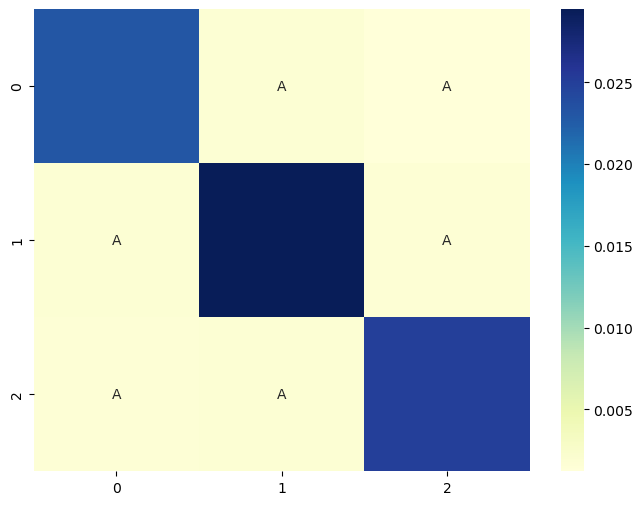

In [11]:
plt.figure(figsize=(8,6))
annot = comm_matrix.copy()

N,_ = annot.shape
for i in range(N):
    for j in range(N):
        if annot[i,j] == 'Assortative':
            annot[i,j] = 'A'
        elif annot[i,j] == 'Core-Periphery':
            annot[i,j] = 'CP'
        elif annot[i,j] == 'Disassortative':
            annot[i,j] = 'D'
        elif annot[i,j] == 'Source-Basin':
            annot[i,j] = 'SB'
        else:
            annot[i,j] = ''
ax = sns.heatmap(den,annot=annot,fmt = '', cmap="YlGnBu")

## SBM

In [12]:
#For SBM, node_order is based on graph_tool network. vp_name is unique node attribute name

from Converter import *
vp_name = 'title'
G_gt = convert_nx_to_gt(G, vp_name = vp_name,ep_name = ep_name)
node_order_gt = [G_gt.vp[vp_name][n] for n in G_gt.vertices()]

filename = "./Outputs/Case/polblogs_SBM_B.par"

with open(filename,"rb") as f:
    sbm_par = pickle.load(f)
par = sbm_par['B=5']
den,comm_matrix = summary(G_nx,par,node_order = node_order_gt,ep_name = ep_name,reverse_dir = True)

The number of communities is  5
The number of eligible community is  5
Community structure types fractions are as follows 
Core-Periphery  fraction:  0.9
Source-Basin  fraction:  0.1


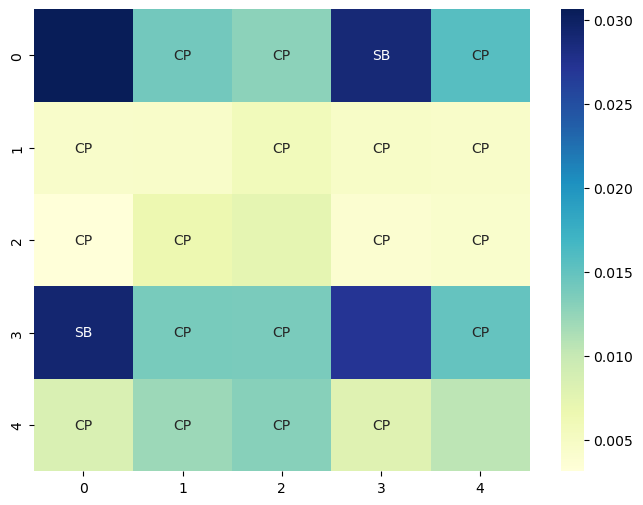

In [13]:
#plot
plt.figure(figsize=(8,6))
annot = comm_matrix.copy()

N,_ = annot.shape
for i in range(N):
    for j in range(N):
        if annot[i,j] == 'Assortative':
            annot[i,j] = 'A'
        elif annot[i,j] == 'Core-Periphery':
            annot[i,j] = 'CP'
        elif annot[i,j] == 'Disassortative':
            annot[i,j] = 'D'
        elif annot[i,j] == 'Source-Basin':
            annot[i,j] = 'SB'
        else:
            annot[i,j] = ''
ax = sns.heatmap(den,annot=annot,fmt = '', cmap="YlGnBu")

## Test robustness of community structure type

* Compute the robustness of classified type via N times of boostrapping 

* Robustness score is $[0,1]$ where 0 means none of N times boostrapping gives the same classification and 1 means all N times boostrapping give the same classification.

In [14]:
from robustness import *

### SBM Partition

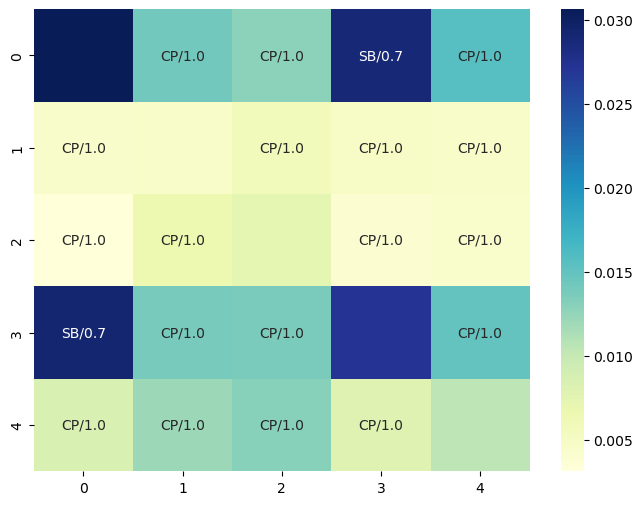

In [15]:
P = certainty(G_nx,par,node_order = node_order_gt,ep_name = ep_name,reverse_dir = True)

m = P['Interation-three']
plt.figure(figsize=(8,6))
annot = comm_matrix.copy()

N,_ = annot.shape
for i in range(N):
    for j in range(N):
        if annot[i,j] == 'Assortative':
            annot[i,j] = 'A'+'/'+str(round(m[i,j],2))
        elif annot[i,j] == 'Core-Periphery':
            annot[i,j] = 'CP'+ '/' + str(round(m[i,j],2))
        elif annot[i,j] == 'Disassortative':
            annot[i,j] = 'D'+ '/' + str(round(m[i,j],2))
        elif annot[i,j] == 'Source-Basin':
            annot[i,j] = 'SB'+ '/' + str(round(m[i,j],2))
        else:
            annot[i,j] = ''
ax = sns.heatmap(den,annot=annot,fmt = '', cmap="YlGnBu")

### Louvain Partition

In [16]:
P = certainty(G_nx,par,node_order = node_order_nx,ep_name = ep_name,reverse_dir = True)

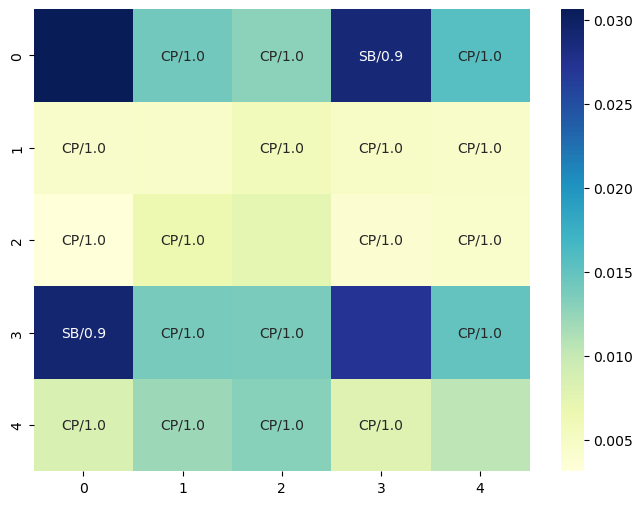

In [17]:
m = P['Interation-three']
plt.figure(figsize=(8,6))
annot = comm_matrix.copy()

N,_ = annot.shape
for i in range(N):
    for j in range(N):
        if annot[i,j] == 'Assortative':
            annot[i,j] = 'A'+'/'+str(round(m[i,j],2))
        elif annot[i,j] == 'Core-Periphery':
            annot[i,j] = 'CP'+ '/' + str(round(m[i,j],2))
        elif annot[i,j] == 'Disassortative':
            annot[i,j] = 'D'+ '/' + str(round(m[i,j],2))
        elif annot[i,j] == 'Source-Basin':
            annot[i,j] = 'SB'+ '/' + str(round(m[i,j],2))
        else:
            annot[i,j] = ''
ax = sns.heatmap(den,annot=annot,fmt = '', cmap="YlGnBu")